Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Score'],
      dtype='object')


<AxesSubplot:>

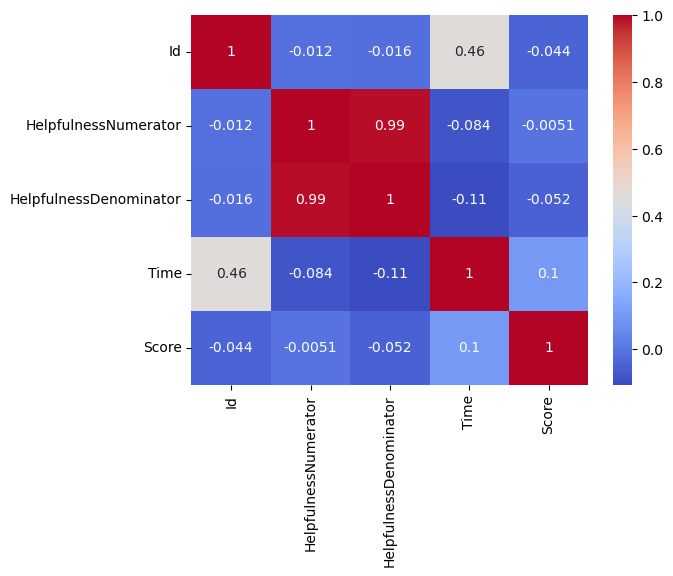

In [ ]:
import pandas as pd
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('data/train.csv')
df=df[:20000]
print(df.keys())
cols = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'ProductId', 'Time']

# Compute the correlation matrix
corr = df.corr()

# Plot the correlation matrix using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')

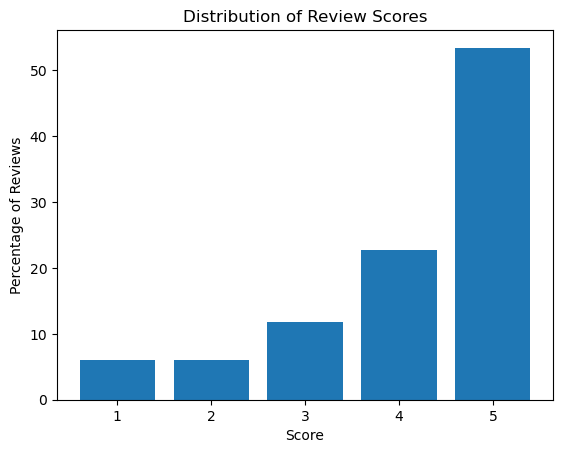

In [ ]:
import matplotlib.pyplot as plt
# Calculate the percentage of reviews with each score
score_counts = df['Score'].value_counts(normalize=True) * 100

# Plot the results
plt.bar(score_counts.index, score_counts.values)
plt.xlabel('Score')
plt.ylabel('Percentage of Reviews')
plt.title('Distribution of Review Scores')
plt.show()

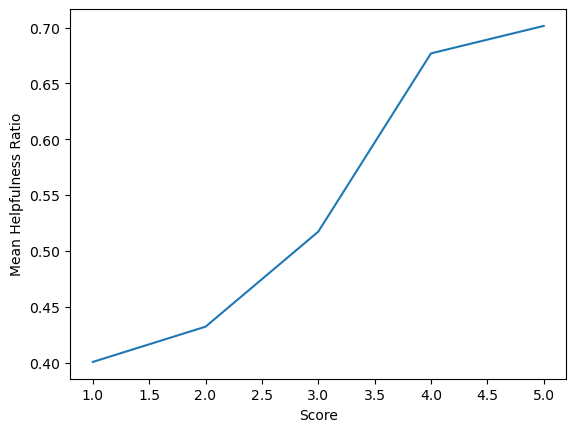

In [ ]:
# Calculate the helpfulness ratio for each review
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']

# Group the data by score and calculate the mean helpfulness ratio for each group
grouped_data = df.groupby('Score')['HelpfulnessRatio'].mean()

# Plot the mean helpfulness ratio by score
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Score')
plt.ylabel('Mean Helpfulness Ratio')
plt.show()

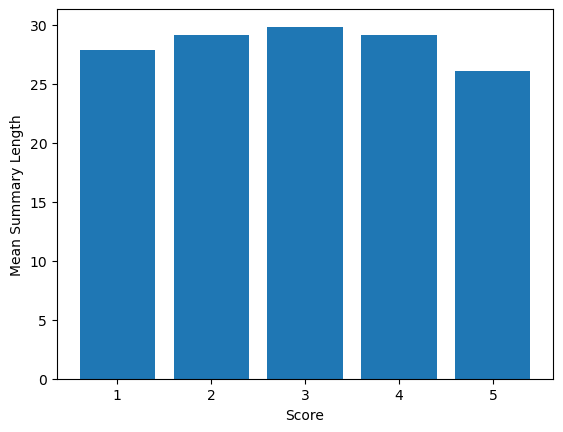

In [ ]:
# Calculate the length of each summary
df['SummaryLength'] = df['Summary'].str.len()

# Group the data by score and calculate the mean summary length for each group
grouped = df.groupby('Score')['SummaryLength'].mean()

# Plot the summary length by score
plt.bar(grouped.index, grouped.values)
plt.xlabel('Score')
plt.ylabel('Mean Summary Length')
plt.show()

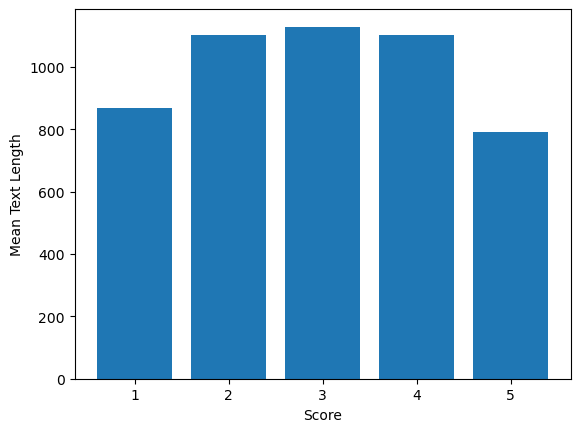

In [ ]:
# Calculate the length of each summary
df['TextLength'] = df['Text'].str.len()

# Group the data by score and calculate the mean summary length for each group
grouped = df.groupby('Score')['TextLength'].mean()

# Plot the summary length by score
plt.bar(grouped.index, grouped.values)
plt.xlabel('Score')
plt.ylabel('Mean Text Length')
plt.show()

/var/folders/8t/xtz7fzyn6_gg4jxvqj42whvh0000gn/T/ipykernel_19802/588069890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['Time'] = pd.to_datetime(df_product['Time'])


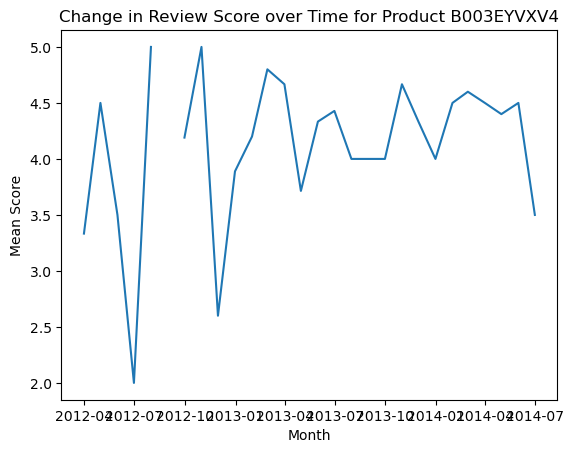

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot the average score over time for a specific product
product_id = 'B003EYVXV4'
df_product = df[df['ProductId'] == product_id]
# Convert the "ReviewId" column to a datetime format
df_product['Time'] = pd.to_datetime(df_product['Time'])

# Set the "ReviewId" column as the index of the dataframe
df_product.set_index('Time', inplace=True)

# Group the data by month and calculate the mean "Score" for each month
df_monthly = df_product.resample('M').mean()

# Plot the mean score for each month
plt.plot(df_monthly['Score'])
plt.title('Change in Review Score over Time for Product ' + product_id)
plt.xlabel('Month')
plt.ylabel('Mean Score')
plt.show()

In [ ]:
from nltk.corpus import stopwords
import csv 
# Load stop words
stop_words = set(stopwords.words('english'))

# Open CSV file
with open('data/train.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        
        # Get text and summary columns
        text = row['Text']
        summary = row['Summary']
        
        # Split text and summary into words
        text_words = text.split()
        summary_words = summary.split()
        
        # Print stop words in text and summary
        text_stop_words = [word for word in text_words if word.lower() in stop_words]
        summary_stop_words = [word for word in summary_words if word.lower() in stop_words]
        print('Text stop words:', text_stop_words)
        print('Summary stop words:', summary_stop_words)

Text stop words: ['I', 'have', 'of', 'and', 'over', 'so', 'this', "didn't", 'me', 'too', 'with', 'They', 'a', 'of', 'and', 'in', 'the', 'and', 'to', 'do', 'I', 'was', 'not', 'so', 'on', 'the', 'of', 'some', 'of', 'the', 'to', 'but', 'that', 'is', 'What', 'I', 'did', 'is', 'the', 'of', 'the', 'and', 'which', 'is', 'a', 'to', 'the', 'but', 'not', 'too', 'What', 'I', 'am', 'is', 'the', 'I', "don't", 'they', 'the', 'and', 'out', 'The', 'of', 'some', 'of', 'Some', 'as', 'as', 'all', 'while', 'other', 'and', 'at', 'am', 'there', 'are', 'some', 'in', 'with', 'some', 'but', 'this', 'is', 'a', 'I', 'this', 'on', 'not']
Summary stop words: ['but', 'not', 'all']
Text stop words: ['As', 'a', 'of', 'all', 'of', 'I', 'of', 'of', 'as', 'the', 'and', 'from', 'She', 'the', 'in', 'the', 'through', 'her', 'and', 'of', 'a', 'and', 'to', 'the', 'I', 'this', 'and', 'it', 'to', 'all']
Summary stop words: []
Text stop words: ['This', 'is', 'about', 'a', 'and', 'a', 'who', 'to', 'out', 'his', 'for', 'The', 'ha

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Text stop words: ['There', 'is', 'about', 'this', 'the', 'are', 'and', 'the', 'to', 'and', 'to', 'about', 'this']
Summary stop words: ['About', 'a', 'of']
Text stop words: ['a', 'and', 'it', 'for', 'all', 'its', 'a', 'and', 'are', 'but', 'this', 'is', 'a', 'with', 'of', 'and', 'to', 'an']
Summary stop words: []
Text stop words: ['If', 'you', 'out', 'on', 'the', 'is', 'there', 'on', 'this', 'the', 'about', 'to', 'me', 'and', 'out', 'but', 'I', 'for', 'that', 'and', 'having', 'the', 'in', 'for', 'the', 'the', 'is', 'that', 'while', 'you']
Summary stop words: []
Text stop words: ['This', 'is', 'an', 'and', 'it', 'is', 'by', 'the', 'of', 'the', 'I', 'of', 'the', 'the', 'I', 'out', 'of', 'I', 'it', 'to', 'who']
Summary stop words: []
Text stop words: []
Summary stop words: []
Text stop words: ['has', 'been', 'about', 'the', 'The', 'on', 'this', 'is', 'I', 'am', 'not', 'a', 'of', 'the', 'but', 'this', 'in', 'was', 'The', 'that', 'about', 'the', 'was', 'was', 'some', 'of', 'the', 'I', 'have',

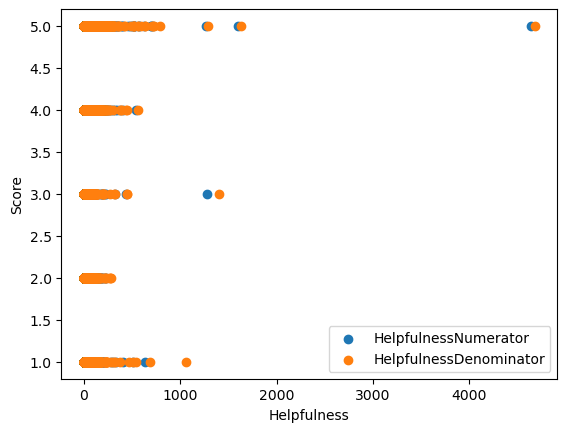

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the relevant features
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
data = df[features]

# Create the scatter plot
plt.scatter(data['HelpfulnessNumerator'], data['Score'], label='HelpfulnessNumerator')
plt.scatter(data['HelpfulnessDenominator'], data['Score'], label='HelpfulnessDenominator')
plt.xlabel('Helpfulness')
plt.ylabel('Score')
plt.legend()
plt.show()

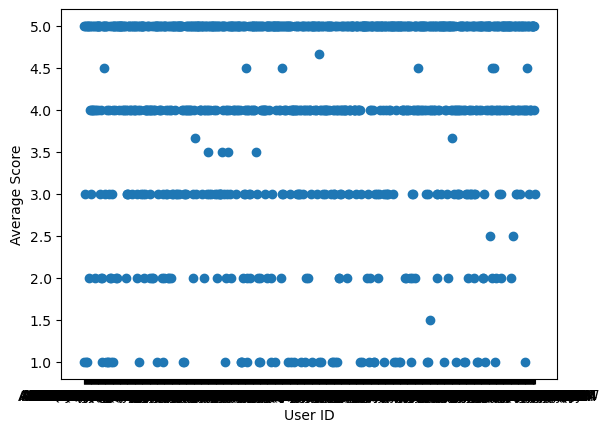

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = df[:1000]
# Group the data by userid and calculate the average score for each group
grouped_data = data.groupby('UserId')['Score'].mean()

# Plot the average score for each userid
plt.scatter(grouped_data.index, grouped_data.values)
plt.xlabel('User ID')
plt.ylabel('Average Score')
plt.show()

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

data=df[:10000]
# Define the stop words
stop_words = set(stopwords.words('english'))

# Create a dictionary to store the frequency of stop words by score
freq_by_score = {}

# Loop through each row in the dataset
for index, row in data.iterrows():
    # Check if the value in the 'Text' column is a string
    if isinstance(row['Text'], str):
        # Split the text into words
        words = row['Text'].lower().split()
        # Remove stop words
        words = [word for word in words if word not in stop_words]
        # Count the frequency of each stop word
        for word in words:
            if word in freq_by_score:
                freq_by_score[word][row['Score']] += 1
            else:
                freq_by_score[word] = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
                freq_by_score[word][row['Score']] += 1

# Sort the dictionary by the total frequency of each stop word
sorted_freq = sorted(freq_by_score.items(), key=lambda x: sum(x[1].values()), reverse=True)

# Print the top 10 stop words by score
for word, freq in sorted_freq[:20]:
    print(word)
    print('Score 1:', freq[1])
    print('Score 2:', freq[2])
    print('Score 3:', freq[3])
    print('Score 4:', freq[4])
    print('Score 5:', freq[5])
    print('Total:', sum(freq.values()))
    print()

movie
Score 1: 701
Score 2: 603
Score 3: 1149
Score 4: 1916
Score 5: 3522
Total: 7891

one
Score 1: 344
Score 2: 406
Score 3: 840
Score 4: 1634
Score 5: 3105
Total: 6329

film
Score 1: 286
Score 2: 458
Score 3: 942
Score 4: 1862
Score 5: 2519
Total: 6067

like
Score 1: 381
Score 2: 426
Score 3: 794
Score 4: 1261
Score 5: 2080
Total: 4942

good
Score 1: 180
Score 2: 233
Score 3: 600
Score 4: 1221
Score 5: 1554
Total: 3788

great
Score 1: 79
Score 2: 112
Score 3: 336
Score 4: 849
Score 5: 2257
Total: 3633

would
Score 1: 242
Score 2: 279
Score 3: 546
Score 4: 900
Score 5: 1275
Total: 3242

really
Score 1: 179
Score 2: 269
Score 3: 466
Score 4: 838
Score 5: 1275
Total: 3027

get
Score 1: 180
Score 2: 240
Score 3: 392
Score 4: 703
Score 5: 1211
Total: 2726

story
Score 1: 138
Score 2: 186
Score 3: 416
Score 4: 766
Score 5: 1185
Total: 2691

see
Score 1: 161
Score 2: 193
Score 3: 358
Score 4: 678
Score 5: 1282
Total: 2672

first
Score 1: 138
Score 2: 163
Score 3: 363
Score 4: 757
Score 5: 1

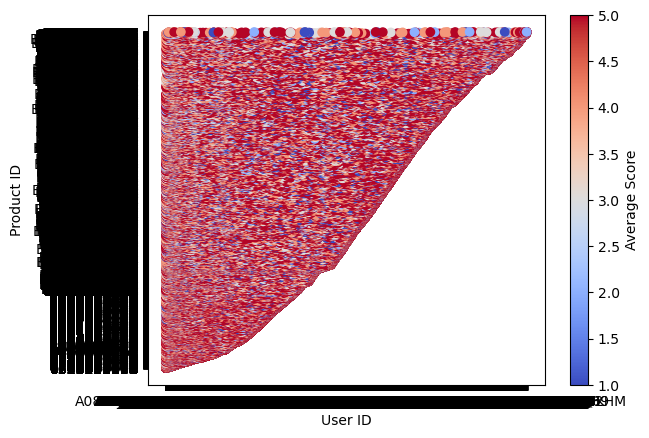

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by productid and userid, and calculate the average score
grouped_data = df.groupby(['ProductId', 'UserId']).mean()['Score'].reset_index()

# Plot the data
plt.scatter(grouped_data['UserId'], grouped_data['ProductId'], c=grouped_data['Score'], cmap='coolwarm')
plt.xlabel('User ID')
plt.ylabel('Product ID')
plt.colorbar(label='Average Score')
plt.show()

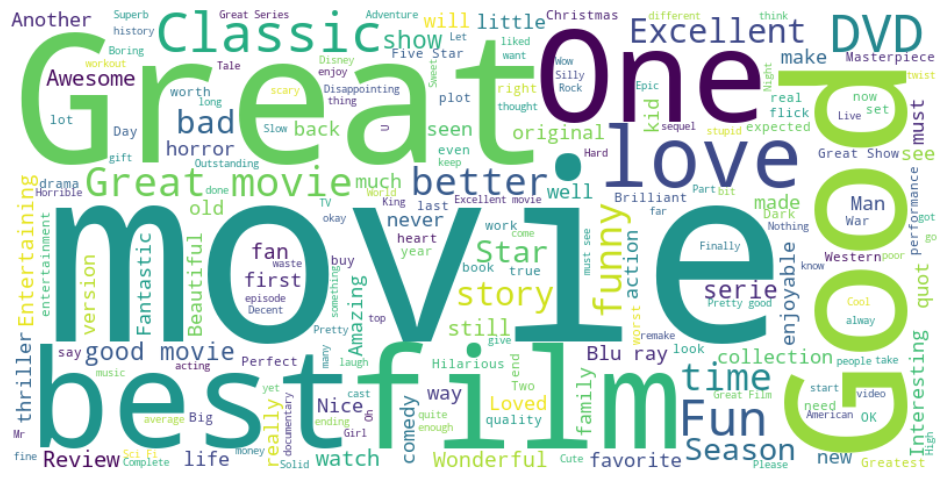

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the summaries into a single string
summary_text = ' '.join(df['Summary'].astype(str).tolist())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

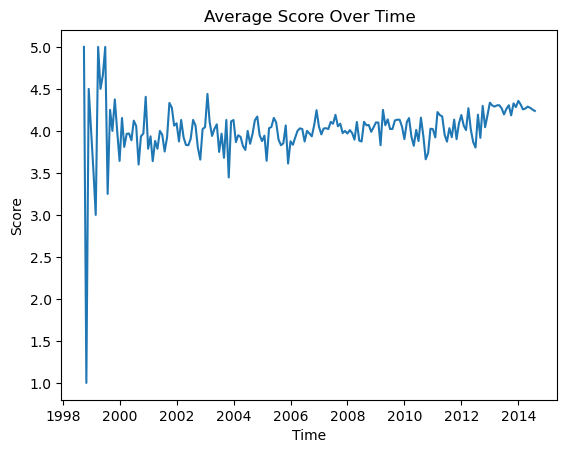

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/train.csv')
df=df[:20000]

# Convert the epoch time to a datetime object
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Group the data by time and calculate the mean score
grouped = df.groupby(pd.Grouper(key='Time', freq='M')).mean()

# Create a time series plot of the scores
plt.plot(grouped.index, grouped['Score'])
plt.xlabel('Time')
plt.ylabel('Score')
plt.title('Average Score Over Time')
plt.show()